# Data cleaning

*Aggregate data into one Data Frame using Pandas.*

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import boxcox

In [3]:
def load_original_data():
    file3 = pd.read_csv('file3.csv')
    return file3

*Giving the same name to the columns of all files*

In [4]:
def rename_columns():
    file3 = load_original_data()
    file3.rename(columns={'State':'ST', 'Gender': 'GENDER'}, inplace=True )
    return file3

In [5]:
file3= rename_columns()

*Rename the new and clean file*

In [6]:
file3.to_csv('file3_clean.csv')

*Concatenating the 3 files*

In [7]:
def load_original_data():
    file1 = pd.read_csv('file1.csv')
    file2 = pd.read_csv('file2.csv')
    file3 = pd.read_csv('file3_clean.csv')
    return pd.concat([file1,file2,file3], axis=0)

*Giving the value to the new function*

In [8]:
customer_df=load_original_data()

*Standardizing header names*

In [9]:
def lower_case_column_names(customer_df):
    customer_df.columns=[i.lower() for i in customer_df.columns]
    return customer_df

In [340]:
lower_case_column_names(customer_df)

,customer,st,gender,education,customer lifetime value,income,monthly premium auto,number of open complaints,policy type,vehicle class,total claim amount,unnamed: 0
0,RB50392,Washington,NaN,Master,NaN,0.0,1000.0,1/0/00,Personal Auto,Four-Door Car,2.704934,NaN
1,QZ44356,Arizona,F,Bachelor,697953.59%,0.0,94.0,1/0/00,Personal Auto,Four-Door Car,1131.464935,NaN
2,AI49188,Nevada,F,Bachelor,1288743.17%,48767.0,108.0,1/0/00,Personal Auto,Two-Door Car,566.472247,NaN
3,WW63253,California,M,Bachelor,764586.18%,0.0,106.0,1/0/00,Corporate Auto,SUV,529.881344,NaN
4,GA49547,Washington,M,High School or Below,536307.65%,36357.0,68.0,1/0/00,Personal Auto,Four-Door Car,17.269323,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
7065,LA72316,California,M,Bachelor,23405.98798,71941.0,73.0,0,Personal Auto,Four-Door Car,198.234764,7065.0
7066,PK87824,California,F,College,3096.511217,21604.0,79.0,0,Corporate Auto,Four-Door Car,379.200000,7066.0
7067,TD14365,California,M,Bachelor,8163.890428,0.0,85.0,3,Corporate Auto,Four-Door Car,790.784983,7067.0
7068,UP19263,California,M,College,7524.442436,21941.0,96.0,0,Personal Auto,Four-Door Car,691.200000,7068.0


*Delete the column customer*

In [10]:
def drop_columns(customer_df) :
    customer_df.drop(columns=["customer"], inplace=True)
    return customer_df

In [11]:
drop_columns(customer_df)

KeyError: "['customer'] not found in axis"

*Checking the types of values*

In [1]:
customer_df.info()

NameError: name 'customer_df' is not defined

In [344]:
customer_df['number of open complaints'] =  pd.to_numeric(customer_df['number of open complaints'], errors ='ignore')
customer_df

,st,gender,education,customer lifetime value,income,monthly premium auto,number of open complaints,policy type,vehicle class,total claim amount,unnamed: 0
0,Washington,NaN,Master,NaN,0.0,1000.0,1/0/00,Personal Auto,Four-Door Car,2.704934,NaN
1,Arizona,F,Bachelor,697953.59%,0.0,94.0,1/0/00,Personal Auto,Four-Door Car,1131.464935,NaN
2,Nevada,F,Bachelor,1288743.17%,48767.0,108.0,1/0/00,Personal Auto,Two-Door Car,566.472247,NaN
3,California,M,Bachelor,764586.18%,0.0,106.0,1/0/00,Corporate Auto,SUV,529.881344,NaN
4,Washington,M,High School or Below,536307.65%,36357.0,68.0,1/0/00,Personal Auto,Four-Door Car,17.269323,NaN
...,...,...,...,...,...,...,...,...,...,...,...
7065,California,M,Bachelor,23405.98798,71941.0,73.0,0,Personal Auto,Four-Door Car,198.234764,7065.0
7066,California,F,College,3096.511217,21604.0,79.0,0,Corporate Auto,Four-Door Car,379.200000,7066.0
7067,California,M,Bachelor,8163.890428,0.0,85.0,3,Corporate Auto,Four-Door Car,790.784983,7067.0
7068,California,M,College,7524.442436,21941.0,96.0,0,Personal Auto,Four-Door Car,691.200000,7068.0


*Extract the middle number of "number of open complaints"*

In [345]:
customer_df['number of open complaints'].unique().tolist()

['1/0/00',
 '1/2/00',
 '1/1/00',
 '1/3/00',
 '1/5/00',
 '1/4/00',
 nan,
 0,
 2,
 3,
 1,
 5,
 4]

In [346]:
customer_df.loc[:, 'number of open complaints'][(customer_df['number of open complaints'] == '1/0/00')] = 0
customer_df.loc[:, 'number of open complaints'][(customer_df['number of open complaints'] == '1/2/00')] = 2
customer_df.loc[:, 'number of open complaints'][(customer_df['number of open complaints'] == '1/3/00')] = 3
customer_df.loc[:, 'number of open complaints'][(customer_df['number of open complaints'] == '1/5/00')] = 5
customer_df.loc[:, 'number of open complaints'][(customer_df['number of open complaints'] == '1/4/00')] = 4
customer_df.loc[:, 'number of open complaints'][(customer_df['number of open complaints'] == '1/1/00')] = 1
customer_df['number of open complaints'].unique()

/var/folders/qg/crcztcy17rbfrp2nsq_7_5lw0000gn/T/ipykernel_30368/4127312646.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customer_df.loc[:, 'number of open complaints'][(customer_df['number of open complaints'] == '1/0/00')] = 0
/var/folders/qg/crcztcy17rbfrp2nsq_7_5lw0000gn/T/ipykernel_30368/4127312646.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customer_df.loc[:, 'number of open complaints'][(customer_df['number of open complaints'] == '1/2/00')] = 2
/var/folders/qg/crcztcy17rbfrp2nsq_7_5lw0000gn/T/ipykernel_30368/4127312646.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slic

array([0, 2, 1, 3, 5, 4, nan], dtype=object)

*Remove the percentage from the customer lifetime value and truncate it to an integer value*

In [347]:
customer_df['customer lifetime value'] = customer_df['customer lifetime value'].str.rstrip('%').astype('float') / 100.0

*Removing duplicates*

In [348]:
customer_df=customer_df.drop_duplicates()

In [349]:
customer_df.drop_duplicates(inplace=True)

/var/folders/qg/crcztcy17rbfrp2nsq_7_5lw0000gn/T/ipykernel_30368/2601111028.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customer_df.drop_duplicates(inplace=True)


In [350]:
customer_df.duplicated().sum()

0

In [351]:
customer_df[customer_df['income'].isna()==True]

,st,gender,education,customer lifetime value,income,monthly premium auto,number of open complaints,policy type,vehicle class,total claim amount,unnamed: 0
1071,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [352]:
mean_median_income = np.mean(customer_df['income'])
customer_df['income'] = customer_df['income'].fillna(mean_median_income)

/var/folders/qg/crcztcy17rbfrp2nsq_7_5lw0000gn/T/ipykernel_30368/102721562.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customer_df['income'] = customer_df['income'].fillna(mean_median_income)


In [353]:
mean_median_mpa = np.mean(customer_df['monthly premium auto'])
customer_df['monthly premium auto'] = customer_df['monthly premium auto'].fillna(mean_median_mpa)

/var/folders/qg/crcztcy17rbfrp2nsq_7_5lw0000gn/T/ipykernel_30368/3577297851.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customer_df['monthly premium auto'] = customer_df['monthly premium auto'].fillna(mean_median_mpa)


In [354]:
mean_median_tca = np.mean(customer_df['total claim amount'])
customer_df['total claim amount'] = customer_df['total claim amount'].fillna(mean_median_tca)

/var/folders/qg/crcztcy17rbfrp2nsq_7_5lw0000gn/T/ipykernel_30368/2597548493.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customer_df['total claim amount'] = customer_df['total claim amount'].fillna(mean_median_tca)


In [355]:
mean_median_u8 = np.mean(customer_df['unnamed: 0'])
customer_df['unnamed: 0'] = customer_df['unnamed: 0'].fillna(mean_median_u8)

/var/folders/qg/crcztcy17rbfrp2nsq_7_5lw0000gn/T/ipykernel_30368/1244533518.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customer_df['unnamed: 0'] = customer_df['unnamed: 0'].fillna(mean_median_u8)


In [356]:
customer_df['gender'].unique()

array([nan, 'F', 'M', 'Femal', 'Male', 'female'], dtype=object)

In [357]:
customer_df.loc[:, 'gender'][(customer_df['gender'] == 'female')] = "F"
customer_df.loc[:, 'gender'][(customer_df['gender'] == 'Femal')] = "F"
customer_df.loc[:, 'gender'][(customer_df['gender'] == 'Male')] = "M"


customer_df['gender'].unique()

/var/folders/qg/crcztcy17rbfrp2nsq_7_5lw0000gn/T/ipykernel_30368/500728694.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customer_df.loc[:, 'gender'][(customer_df['gender'] == 'female')] = "F"
/var/folders/qg/crcztcy17rbfrp2nsq_7_5lw0000gn/T/ipykernel_30368/500728694.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customer_df.loc[:, 'gender'][(customer_df['gender'] == 'female')] = "F"
/var/folders/qg/crcztcy17rbfrp2nsq_7_5lw0000gn/T/ipykernel_30368/500728694.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.py

array([nan, 'F', 'M'], dtype=object)

In [358]:
customer_df.gender.unique()

array([nan, 'F', 'M'], dtype=object)

In [359]:
customer_df.st.unique()

array(['Washington', 'Arizona', 'Nevada', 'California', 'Oregon', 'Cali',
       'AZ', 'WA', nan], dtype=object)

In [360]:
customer_df['st'].unique()
customer_df.loc[:,'st'][(customer_df['st'] == 'Cali')] = "California"
customer_df.loc[:,'st'][(customer_df['st'] == 'AZ')] = "Arizona"
customer_df.loc[:,'st'][(customer_df['st'] == 'WA')] = "Washington"
customer_df['st'].unique()

/var/folders/qg/crcztcy17rbfrp2nsq_7_5lw0000gn/T/ipykernel_30368/308125048.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customer_df.loc[:,'st'][(customer_df['st'] == 'Cali')] = "California"
/var/folders/qg/crcztcy17rbfrp2nsq_7_5lw0000gn/T/ipykernel_30368/308125048.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customer_df.loc[:,'st'][(customer_df['st'] == 'Cali')] = "California"
/var/folders/qg/crcztcy17rbfrp2nsq_7_5lw0000gn/T/ipykernel_30368/308125048.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata

array(['Washington', 'Arizona', 'Nevada', 'California', 'Oregon', nan],
      dtype=object)

In [361]:
customer_df = customer_df[customer_df['income'].isna()==False]

In [362]:
mean_income = np.mean(customer_df['income'])
customer_df['income'] = customer_df['income'].fillna(mean_income)

In [363]:
customer_df

,st,gender,education,customer lifetime value,income,monthly premium auto,number of open complaints,policy type,vehicle class,total claim amount,unnamed: 0
0,Washington,NaN,Master,NaN,0.0,1000.0,0,Personal Auto,Four-Door Car,2.704934,3534.5
1,Arizona,F,Bachelor,6979.5359,0.0,94.0,0,Personal Auto,Four-Door Car,1131.464935,3534.5
2,Nevada,F,Bachelor,12887.4317,48767.0,108.0,0,Personal Auto,Two-Door Car,566.472247,3534.5
3,California,M,Bachelor,7645.8618,0.0,106.0,0,Corporate Auto,SUV,529.881344,3534.5
4,Washington,M,High School or Below,5363.0765,36357.0,68.0,0,Personal Auto,Four-Door Car,17.269323,3534.5
...,...,...,...,...,...,...,...,...,...,...,...
7065,California,M,Bachelor,NaN,71941.0,73.0,0,Personal Auto,Four-Door Car,198.234764,7065.0
7066,California,F,College,NaN,21604.0,79.0,0,Corporate Auto,Four-Door Car,379.200000,7066.0
7067,California,M,Bachelor,NaN,0.0,85.0,3,Corporate Auto,Four-Door Car,790.784983,7067.0
7068,California,M,College,NaN,21941.0,96.0,0,Personal Auto,Four-Door Car,691.200000,7068.0


In [364]:
mean_median_u8 = np.mean(customer_df['customer lifetime value'])
customer_df['customer lifetime value'] = customer_df['customer lifetime value'].fillna(mean_median_u8)

In [365]:
customer_df

,st,gender,education,customer lifetime value,income,monthly premium auto,number of open complaints,policy type,vehicle class,total claim amount,unnamed: 0
0,Washington,NaN,Master,7794.093685,0.0,1000.0,0,Personal Auto,Four-Door Car,2.704934,3534.5
1,Arizona,F,Bachelor,6979.535900,0.0,94.0,0,Personal Auto,Four-Door Car,1131.464935,3534.5
2,Nevada,F,Bachelor,12887.431700,48767.0,108.0,0,Personal Auto,Two-Door Car,566.472247,3534.5
3,California,M,Bachelor,7645.861800,0.0,106.0,0,Corporate Auto,SUV,529.881344,3534.5
4,Washington,M,High School or Below,5363.076500,36357.0,68.0,0,Personal Auto,Four-Door Car,17.269323,3534.5
...,...,...,...,...,...,...,...,...,...,...,...
7065,California,M,Bachelor,7794.093685,71941.0,73.0,0,Personal Auto,Four-Door Car,198.234764,7065.0
7066,California,F,College,7794.093685,21604.0,79.0,0,Corporate Auto,Four-Door Car,379.200000,7066.0
7067,California,M,Bachelor,7794.093685,0.0,85.0,3,Corporate Auto,Four-Door Car,790.784983,7067.0
7068,California,M,College,7794.093685,21941.0,96.0,0,Personal Auto,Four-Door Car,691.200000,7068.0


In [366]:
mean_without_zeros = customer_df['income'][customer_df['income'] >0].mean()

In [367]:
mean_without_zeros

50504.282410890155

In [368]:
customer_df["income"] = customer_df["income"].replace({0.0: 50504})

In [369]:
customer_df

,st,gender,education,customer lifetime value,income,monthly premium auto,number of open complaints,policy type,vehicle class,total claim amount,unnamed: 0
0,Washington,NaN,Master,7794.093685,50504.0,1000.0,0,Personal Auto,Four-Door Car,2.704934,3534.5
1,Arizona,F,Bachelor,6979.535900,50504.0,94.0,0,Personal Auto,Four-Door Car,1131.464935,3534.5
2,Nevada,F,Bachelor,12887.431700,48767.0,108.0,0,Personal Auto,Two-Door Car,566.472247,3534.5
3,California,M,Bachelor,7645.861800,50504.0,106.0,0,Corporate Auto,SUV,529.881344,3534.5
4,Washington,M,High School or Below,5363.076500,36357.0,68.0,0,Personal Auto,Four-Door Car,17.269323,3534.5
...,...,...,...,...,...,...,...,...,...,...,...
7065,California,M,Bachelor,7794.093685,71941.0,73.0,0,Personal Auto,Four-Door Car,198.234764,7065.0
7066,California,F,College,7794.093685,21604.0,79.0,0,Corporate Auto,Four-Door Car,379.200000,7066.0
7067,California,M,Bachelor,7794.093685,50504.0,85.0,3,Corporate Auto,Four-Door Car,790.784983,7067.0
7068,California,M,College,7794.093685,21941.0,96.0,0,Personal Auto,Four-Door Car,691.200000,7068.0


In [370]:
customer_df["st"] = customer_df["st"].replace({"California": "West Region", "Oregon": "North West", "Washington": "East", "Arizona":"Central", "Nevada":"Central"})

In [371]:
customer_df

,st,gender,education,customer lifetime value,income,monthly premium auto,number of open complaints,policy type,vehicle class,total claim amount,unnamed: 0
0,East,NaN,Master,7794.093685,50504.0,1000.0,0,Personal Auto,Four-Door Car,2.704934,3534.5
1,Central,F,Bachelor,6979.535900,50504.0,94.0,0,Personal Auto,Four-Door Car,1131.464935,3534.5
2,Central,F,Bachelor,12887.431700,48767.0,108.0,0,Personal Auto,Two-Door Car,566.472247,3534.5
3,West Region,M,Bachelor,7645.861800,50504.0,106.0,0,Corporate Auto,SUV,529.881344,3534.5
4,East,M,High School or Below,5363.076500,36357.0,68.0,0,Personal Auto,Four-Door Car,17.269323,3534.5
...,...,...,...,...,...,...,...,...,...,...,...
7065,West Region,M,Bachelor,7794.093685,71941.0,73.0,0,Personal Auto,Four-Door Car,198.234764,7065.0
7066,West Region,F,College,7794.093685,21604.0,79.0,0,Corporate Auto,Four-Door Car,379.200000,7066.0
7067,West Region,M,Bachelor,7794.093685,50504.0,85.0,3,Corporate Auto,Four-Door Car,790.784983,7067.0
7068,West Region,M,College,7794.093685,21941.0,96.0,0,Personal Auto,Four-Door Car,691.200000,7068.0


In [372]:
customer_df = customer_df.applymap(lambda s:s.lower() if type(s) == str else s)

In [373]:
customer_df

,st,gender,education,customer lifetime value,income,monthly premium auto,number of open complaints,policy type,vehicle class,total claim amount,unnamed: 0
0,east,NaN,master,7794.093685,50504.0,1000.0,0.0,personal auto,four-door car,2.704934,3534.5
1,central,f,bachelor,6979.535900,50504.0,94.0,0.0,personal auto,four-door car,1131.464935,3534.5
2,central,f,bachelor,12887.431700,48767.0,108.0,0.0,personal auto,two-door car,566.472247,3534.5
3,west region,m,bachelor,7645.861800,50504.0,106.0,0.0,corporate auto,suv,529.881344,3534.5
4,east,m,high school or below,5363.076500,36357.0,68.0,0.0,personal auto,four-door car,17.269323,3534.5
...,...,...,...,...,...,...,...,...,...,...,...
7065,west region,m,bachelor,7794.093685,71941.0,73.0,0.0,personal auto,four-door car,198.234764,7065.0
7066,west region,f,college,7794.093685,21604.0,79.0,0.0,corporate auto,four-door car,379.200000,7066.0
7067,west region,m,bachelor,7794.093685,50504.0,85.0,3.0,corporate auto,four-door car,790.784983,7067.0
7068,west region,m,college,7794.093685,21941.0,96.0,0.0,personal auto,four-door car,691.200000,7068.0


In [374]:
customer_df._get_numeric_data()

,customer lifetime value,income,monthly premium auto,number of open complaints,total claim amount,unnamed: 0
0,7794.093685,50504.0,1000.0,0.0,2.704934,3534.5
1,6979.535900,50504.0,94.0,0.0,1131.464935,3534.5
2,12887.431700,48767.0,108.0,0.0,566.472247,3534.5
3,7645.861800,50504.0,106.0,0.0,529.881344,3534.5
4,5363.076500,36357.0,68.0,0.0,17.269323,3534.5
...,...,...,...,...,...,...
7065,7794.093685,71941.0,73.0,0.0,198.234764,7065.0
7066,7794.093685,21604.0,79.0,0.0,379.200000,7066.0
7067,7794.093685,50504.0,85.0,3.0,790.784983,7067.0
7068,7794.093685,21941.0,96.0,0.0,691.200000,7068.0


In [375]:
customer_df.select_dtypes('object')

,st,gender,education,policy type,vehicle class
0,east,NaN,master,personal auto,four-door car
1,central,f,bachelor,personal auto,four-door car
2,central,f,bachelor,personal auto,two-door car
3,west region,m,bachelor,corporate auto,suv
4,east,m,high school or below,personal auto,four-door car
...,...,...,...,...,...
7065,west region,m,bachelor,personal auto,four-door car
7066,west region,f,college,corporate auto,four-door car
7067,west region,m,bachelor,corporate auto,four-door car
7068,west region,m,college,personal auto,four-door car


In [376]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [377]:
df2 = pd.read_csv('Data_Marketing_Customer_Analysis_Round3.csv')
df2

,Unnamed: 0,region,customer_lifetime_value,response,coverage,education,effective_to_date,month,employment_status,gender,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,0,central,4809,no,basic,college,2/18/11,feb,employed,m,...,52,0,9,corporate auto,corporate l3,offer3,agent,292,four-door car,medsize
1,1,west region,2228,no,basic,college,1/18/11,jan,unemployed,f,...,26,0,1,personal auto,personal l3,offer4,call center,744,four-door car,medsize
2,2,east,14947,no,basic,bachelor,2/10/11,feb,employed,m,...,31,0,2,personal auto,personal l3,offer3,call center,480,suv,medsize
3,3,north west,22332,yes,extended,college,1/11/11,jan,employed,m,...,3,0,2,corporate auto,corporate l3,offer2,branch,484,four-door car,medsize
4,4,north west,9025,no,premium,bachelor,1/17/11,jan,medical leave,f,...,31,1,7,personal auto,personal l2,offer1,branch,707,four-door car,medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,10684,central,15563,no,premium,bachelor,1/19/11,jan,unemployed,f,...,40,2,7,personal auto,personal l1,offer3,web,1214,luxury car,medsize
10685,10685,north west,5259,no,basic,college,1/6/11,jan,employed,f,...,68,0,6,personal auto,personal l3,offer2,branch,273,four-door car,medsize
10686,10686,central,23893,no,extended,bachelor,2/6/11,feb,employed,f,...,63,0,2,corporate auto,corporate l3,offer1,web,381,luxury suv,medsize
10687,10687,west region,11971,no,premium,college,2/13/11,feb,employed,f,...,27,4,6,personal auto,personal l1,offer1,branch,618,suv,medsize


In [378]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10689 entries, 0 to 10688
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Unnamed: 0                     10689 non-null  int64 
 1   region                         10689 non-null  object
 2   customer_lifetime_value        10689 non-null  int64 
 3   response                       10689 non-null  object
 4   coverage                       10689 non-null  object
 5   education                      10689 non-null  object
 6   effective_to_date              10689 non-null  object
 7   month                          10689 non-null  object
 8   employment_status              10689 non-null  object
 9   gender                         10689 non-null  object
 10  income                         10689 non-null  int64 
 11  location_code                  10689 non-null  object
 12  marital_status                 10689 non-null  object
 13  m

In [379]:
numerical= df2.select_dtypes(include=np.number)
numerical

,Unnamed: 0,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,0,4809,48029,61,7,52,0,9,292
1,1,2228,26794,64,3,26,0,1,744
2,2,14947,22139,100,34,31,0,2,480
3,3,22332,49078,97,10,3,0,2,484
4,4,9025,23675,117,15,31,1,7,707
...,...,...,...,...,...,...,...,...,...
10684,10684,15563,64811,253,8,40,2,7,1214
10685,10685,5259,61146,65,7,68,0,6,273
10686,10686,23893,39837,201,11,63,0,2,381
10687,10687,11971,64195,158,0,27,4,6,618


In [380]:
categorical = df2.select_dtypes(include=object)
categorical

,region,response,coverage,education,effective_to_date,month,employment_status,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,central,no,basic,college,2/18/11,feb,employed,m,suburban,married,corporate auto,corporate l3,offer3,agent,four-door car,medsize
1,west region,no,basic,college,1/18/11,jan,unemployed,f,suburban,single,personal auto,personal l3,offer4,call center,four-door car,medsize
2,east,no,basic,bachelor,2/10/11,feb,employed,m,suburban,single,personal auto,personal l3,offer3,call center,suv,medsize
3,north west,yes,extended,college,1/11/11,jan,employed,m,suburban,single,corporate auto,corporate l3,offer2,branch,four-door car,medsize
4,north west,no,premium,bachelor,1/17/11,jan,medical leave,f,suburban,married,personal auto,personal l2,offer1,branch,four-door car,medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,central,no,premium,bachelor,1/19/11,jan,unemployed,f,suburban,married,personal auto,personal l1,offer3,web,luxury car,medsize
10685,north west,no,basic,college,1/6/11,jan,employed,f,urban,married,personal auto,personal l3,offer2,branch,four-door car,medsize
10686,central,no,extended,bachelor,2/6/11,feb,employed,f,rural,married,corporate auto,corporate l3,offer1,web,luxury suv,medsize
10687,west region,no,premium,college,2/13/11,feb,employed,f,urban,divorced,personal auto,personal l1,offer1,branch,suv,medsize


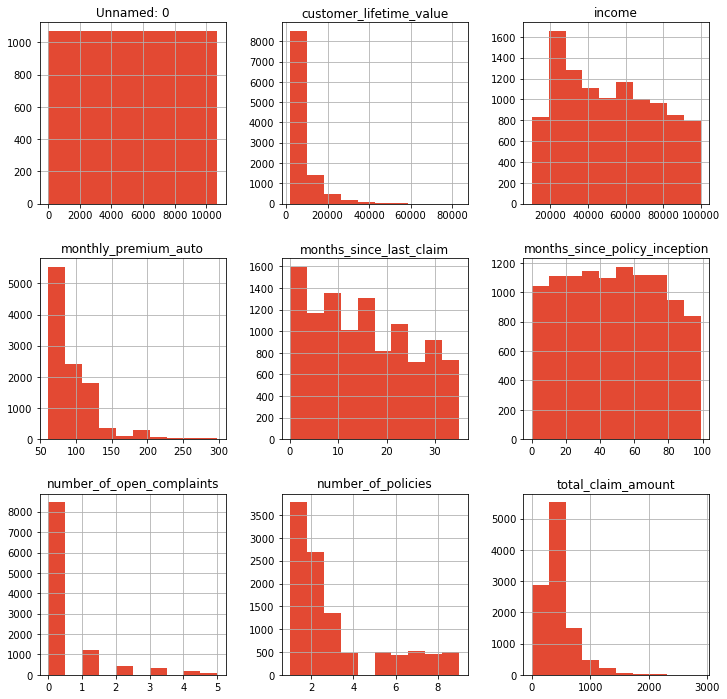

In [381]:
numerical.hist(figsize=(12,12))
plt.show();

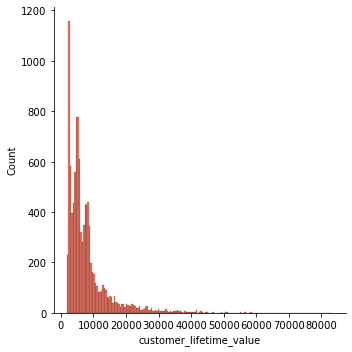

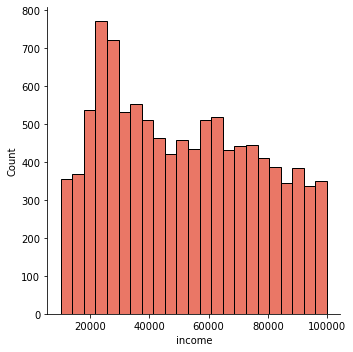

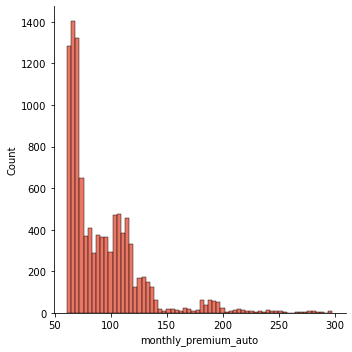

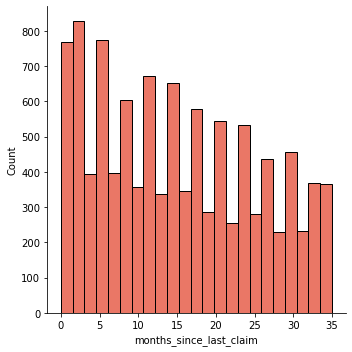

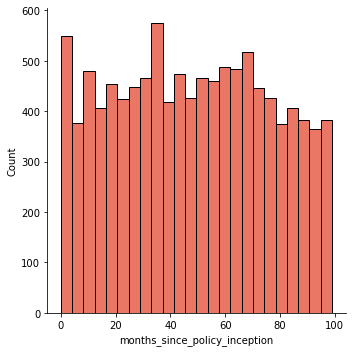

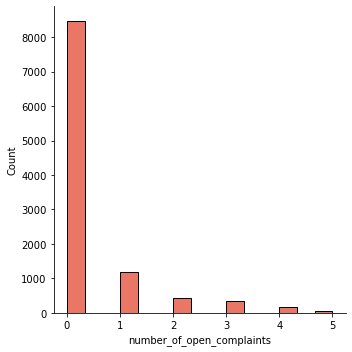

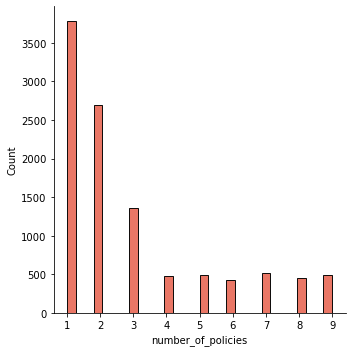

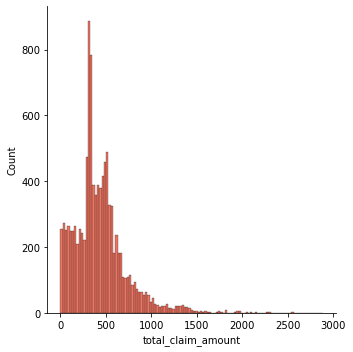

In [382]:
data = df2['customer_lifetime_value']
data1 = df2['income']
data2 = df2['monthly_premium_auto']
data3 = df2['months_since_last_claim']
data4 = df2['months_since_policy_inception']
data5 = df2['number_of_open_complaints']
data6 = df2['number_of_policies']
data7 = df2['total_claim_amount']
sns.displot(data)
sns.displot(data1)
sns.displot(data2)
sns.displot(data3)
sns.displot(data4)
sns.displot(data5)
sns.displot(data6)
sns.displot(data7)

array([[<AxesSubplot:title={'center':'income'}>]], dtype=object)

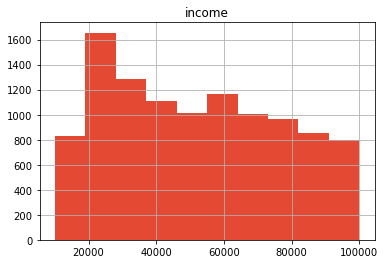

In [383]:
df2.hist(column="income")

array([[<AxesSubplot:title={'center':'customer_lifetime_value'}>]],
      dtype=object)

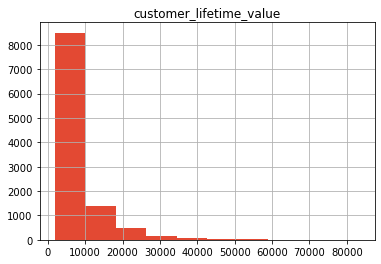

In [384]:
df2.hist(column="customer_lifetime_value")

array([[<AxesSubplot:title={'center':'monthly_premium_auto'}>]],
      dtype=object)

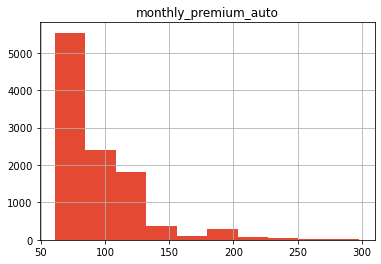

In [385]:
df2.hist(column="monthly_premium_auto")

array([[<AxesSubplot:title={'center':'months_since_policy_inception'}>]],
      dtype=object)

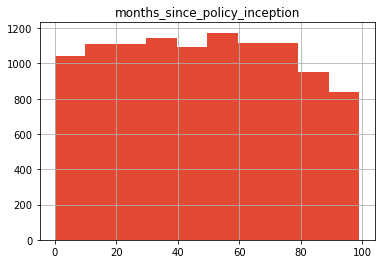

In [386]:
df2.hist(column="months_since_policy_inception")

array([[<AxesSubplot:title={'center':'number_of_open_complaints'}>]],
      dtype=object)

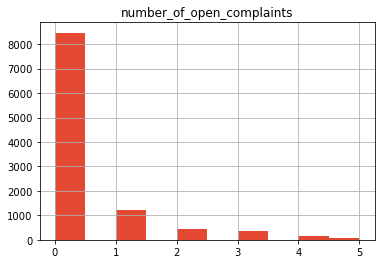

In [387]:
df2.hist(column="number_of_open_complaints")

array([[<AxesSubplot:title={'center':'number_of_policies'}>]],
      dtype=object)

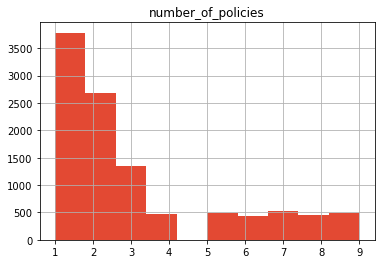

In [388]:
df2.hist(column="number_of_policies")

array([[<AxesSubplot:title={'center':'total_claim_amount'}>]],
      dtype=object)

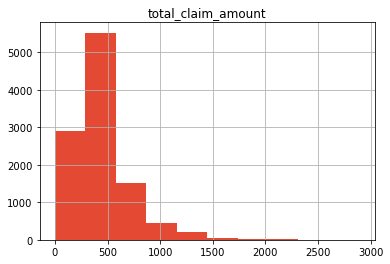

In [389]:
df2.hist(column="total_claim_amount")

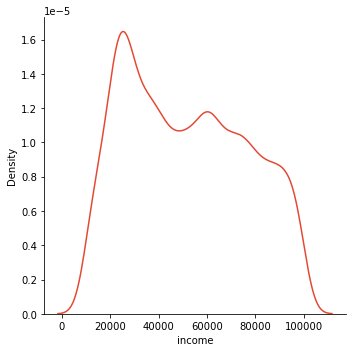

In [390]:
sns.displot(data=df2, x="income", kind="kde")

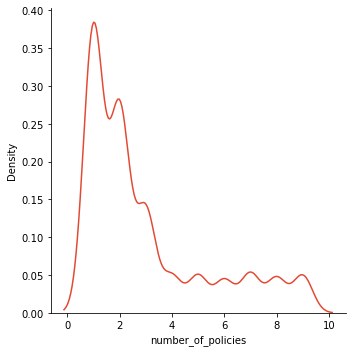

In [391]:
sns.displot(data=df2, x="number_of_policies", kind="kde")

*Correlation heatmap*

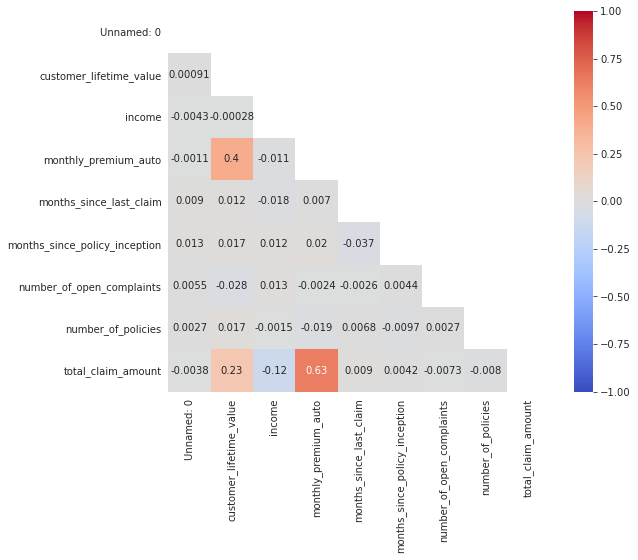

In [392]:
corr = numerical.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(9, 7))
    ax = sns.heatmap(corr, mask=mask,cmap='coolwarm', vmin=-1,vmax=1,annot=True, square=True)

In [393]:
#For the numerical variables, check the multicollinearity between the features. Please note that we will use the column `total_claim_amount` later as the target variable.
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
data= numerical
df2.head()

,Unnamed: 0,region,customer_lifetime_value,response,coverage,education,effective_to_date,month,employment_status,gender,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,0,central,4809,no,basic,college,2/18/11,feb,employed,m,...,52,0,9,corporate auto,corporate l3,offer3,agent,292,four-door car,medsize
1,1,west region,2228,no,basic,college,1/18/11,jan,unemployed,f,...,26,0,1,personal auto,personal l3,offer4,call center,744,four-door car,medsize
2,2,east,14947,no,basic,bachelor,2/10/11,feb,employed,m,...,31,0,2,personal auto,personal l3,offer3,call center,480,suv,medsize
3,3,north west,22332,yes,extended,college,1/11/11,jan,employed,m,...,3,0,2,corporate auto,corporate l3,offer2,branch,484,four-door car,medsize
4,4,north west,9025,no,premium,bachelor,1/17/11,jan,medical leave,f,...,31,1,7,personal auto,personal l2,offer1,branch,707,four-door car,medsize


In [394]:
X = data[['number_of_policies', 'income','customer_lifetime_value','monthly_premium_auto', 'months_since_last_claim', 'months_since_policy_inception','number_of_open_complaints']]
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
print(vif_data)

                         feature       VIF
0             number_of_policies  2.329221
1                         income  4.114033
2        customer_lifetime_value  2.822793
3           monthly_premium_auto  6.892773
4        months_since_last_claim  2.855476
5  months_since_policy_inception  3.386280
6      number_of_open_complaints  1.171581


In [395]:
resp = categorical['response'].value_counts()
resp

no     9328
yes    1361
Name: response, dtype: int64

<BarContainer object of 2 artists>

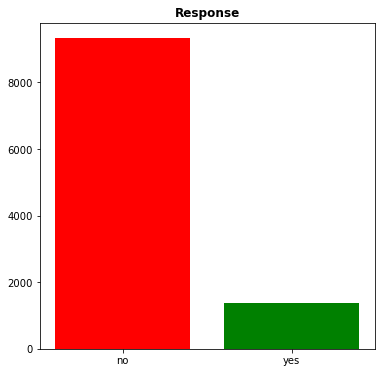

In [396]:
# create figure and axes
fig, ax = plt.subplots(figsize = (6,6))
# set title
ax.set_title('Response', fontweight='bold')
# plot the bar chart
ax.bar(resp.index, resp, color=('red','green'))

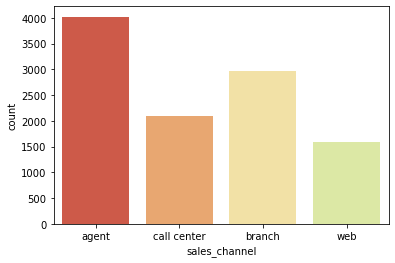

In [397]:
ax = sns.countplot(x="sales_channel", data=categorical)

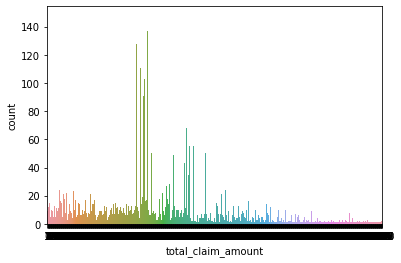

In [398]:
ax = sns.countplot(x="total_claim_amount", data=numerical)

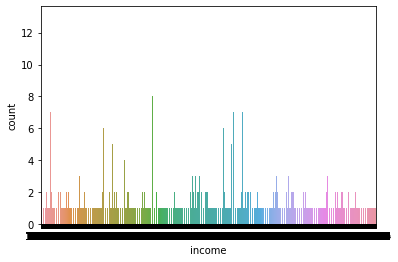

In [399]:
ax = sns.countplot(x="income", data=numerical)

*Show a plot of the response rate by the sales channel.*

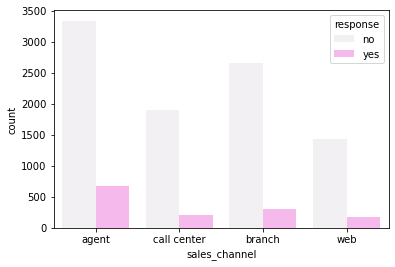

In [400]:
ax = sns.countplot(x="sales_channel", color = '#ffb0f1', hue="response", data= categorical)

*Show a plot of the response rate by the total claim amount.*

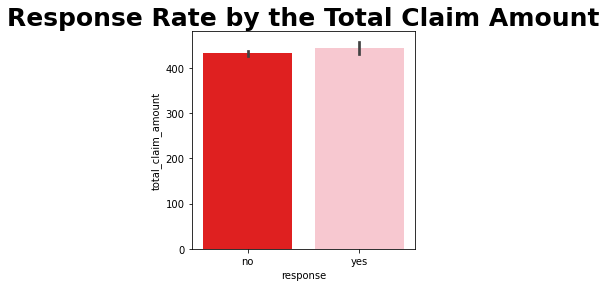

In [401]:
sns.set_palette('RdYlGn')
palette_alive = {"yes": "pink", "no": "red"}
fig, ax1 = plt.subplots(figsize = (4,4))
ax1.set_title('Response Rate by the Total Claim Amount', size='25', fontweight='bold')
sns.barplot(x = categorical['response'], y = numerical['total_claim_amount'], ax = ax1, palette=palette_alive)
plt.show();

*Show a plot of the response rate by income*

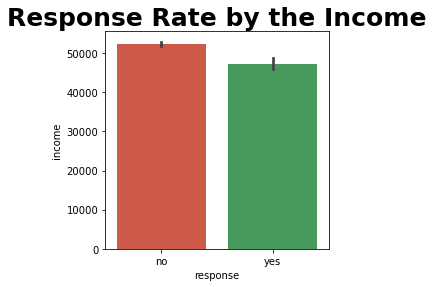

In [402]:
sns.set_palette('RdYlGn')
palette_alive = {"yes": "C5", "no": "C0"}
fig, ax1 = plt.subplots(figsize = (4,4))
ax1.set_title('Response Rate by the Income', size='25', fontweight='bold')
sns.barplot(x = categorical['response'], y = numerical['income'], ax = ax1, palette=palette_alive)
plt.show();

# Lineal regression

 **Encoding of the categorical variables**

In [403]:
#1. One Hot/Label Encoding of the categorical variables in the categoricals data frame that you created in Activity 4. 
#(Hint: check Dropfirst option).

In [404]:
categorical

,region,response,coverage,education,effective_to_date,month,employment_status,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,central,no,basic,college,2/18/11,feb,employed,m,suburban,married,corporate auto,corporate l3,offer3,agent,four-door car,medsize
1,west region,no,basic,college,1/18/11,jan,unemployed,f,suburban,single,personal auto,personal l3,offer4,call center,four-door car,medsize
2,east,no,basic,bachelor,2/10/11,feb,employed,m,suburban,single,personal auto,personal l3,offer3,call center,suv,medsize
3,north west,yes,extended,college,1/11/11,jan,employed,m,suburban,single,corporate auto,corporate l3,offer2,branch,four-door car,medsize
4,north west,no,premium,bachelor,1/17/11,jan,medical leave,f,suburban,married,personal auto,personal l2,offer1,branch,four-door car,medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,central,no,premium,bachelor,1/19/11,jan,unemployed,f,suburban,married,personal auto,personal l1,offer3,web,luxury car,medsize
10685,north west,no,basic,college,1/6/11,jan,employed,f,urban,married,personal auto,personal l3,offer2,branch,four-door car,medsize
10686,central,no,extended,bachelor,2/6/11,feb,employed,f,rural,married,corporate auto,corporate l3,offer1,web,luxury suv,medsize
10687,west region,no,premium,college,2/13/11,feb,employed,f,urban,divorced,personal auto,personal l1,offer1,branch,suv,medsize


In [446]:
new_categorical= pd.get_dummies(categorical, drop_first = True)

In [448]:
new_categorical

,region_east,region_north west,region_west region,response_yes,coverage_extended,coverage_premium,education_college,education_doctor,education_high school or below,education_master,...,sales_channel_branch,sales_channel_call center,sales_channel_web,vehicle_class_luxury car,vehicle_class_luxury suv,vehicle_class_sports car,vehicle_class_suv,vehicle_class_two-door car,vehicle_size_medsize,vehicle_size_small
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,1,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
2,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,1,0
3,0,1,0,1,1,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
4,0,1,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,0,0,0,0,0,1,0,0,0,0,...,0,0,1,1,0,0,0,0,1,0
10685,0,1,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
10686,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,1,0,0,0,1,0
10687,0,0,1,0,0,1,1,0,0,0,...,1,0,0,0,0,0,1,0,1,0


**Remove outlayers**

In [407]:
#2. For the first iteration, we will focus on the numericals data (numericals data frame) as our data source.
#3. Remove the outliers from the numerical columns.

In [408]:
#First, we check which column has outliers
numerical_col = ['customer_lifetime_value','income','monthly_premium_auto', 'months_since_last_claim', 'months_since_policy_inception', 'number_of_open_complaints', 'number_of_policies', 'total_claim_amount']

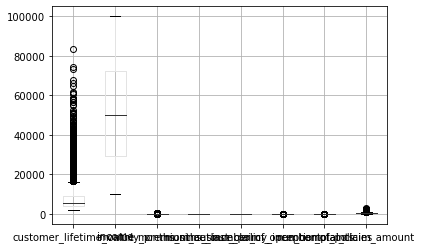

In [409]:
numerical.boxplot(numerical_col)
plt.show();

In [410]:
#Second, we check the outliers number of the column.
q25,q75 = np.percentile(numerical['customer_lifetime_value'],[25,75])
print(q75, q25)

8991.0 4014.0


In [411]:
upper= q75 + 1.5 * (q75 - q25)

In [412]:
lower= q25 - 1.5 * (q75 - q25)

In [413]:
#Creating a new variable without the outlayers
new_numerical = numerical[(numerical['customer_lifetime_value'] < upper) & (numerical['customer_lifetime_value'] > lower)]
new_numerical

,Unnamed: 0,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,0,4809,48029,61,7,52,0,9,292
1,1,2228,26794,64,3,26,0,1,744
2,2,14947,22139,100,34,31,0,2,480
4,4,9025,23675,117,15,31,1,7,707
5,5,4745,50549,61,2,73,0,7,292
...,...,...,...,...,...,...,...,...,...
10682,10682,2771,59855,74,30,82,4,1,355
10684,10684,15563,64811,253,8,40,2,7,1214
10685,10685,5259,61146,65,7,68,0,6,273
10687,10687,11971,64195,158,0,27,4,6,618


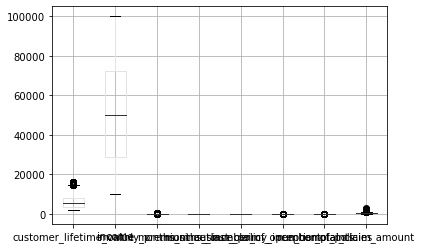

In [414]:
#Checking that we remove the outlayers successfuly
new_numerical.boxplot(numerical_col)
plt.show();

**Correlation**

In [415]:
#4.Check if there are highly correlated features and drop them if there are any.

In [416]:
# Create correlation matrix
corr_matrix = new_numerical.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find features with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

# Drop features 
new_numerical.drop(to_drop, axis=1, inplace=True) 

/var/folders/qg/crcztcy17rbfrp2nsq_7_5lw0000gn/T/ipykernel_30368/1510258818.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
/var/folders/qg/crcztcy17rbfrp2nsq_7_5lw0000gn/T/ipykernel_30368/1510258818.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_numerical.drop(to_drop, axis=1, inplace=True)


In [418]:
new_numerical

,Unnamed: 0,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,0,4809,48029,61,7,52,0,9,292
1,1,2228,26794,64,3,26,0,1,744
2,2,14947,22139,100,34,31,0,2,480
4,4,9025,23675,117,15,31,1,7,707
5,5,4745,50549,61,2,73,0,7,292
...,...,...,...,...,...,...,...,...,...
10682,10682,2771,59855,74,30,82,4,1,355
10684,10684,15563,64811,253,8,40,2,7,1214
10685,10685,5259,61146,65,7,68,0,6,273
10687,10687,11971,64195,158,0,27,4,6,618


**Data splitting**

In [419]:
#X-y split (y is the target variable which is the total claim amount)
X=new_numerical.drop('total_claim_amount', axis=1)
y=new_numerical.total_claim_amount

In [420]:
X=X._get_numeric_data()
X.reset_index(drop= True)

,Unnamed: 0,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
0,0,4809,48029,61,7,52,0,9
1,1,2228,26794,64,3,26,0,1
2,2,14947,22139,100,34,31,0,2
3,4,9025,23675,117,15,31,1,7
4,5,4745,50549,61,2,73,0,7
...,...,...,...,...,...,...,...,...
9723,10682,2771,59855,74,30,82,4,1
9724,10684,15563,64811,253,8,40,2,7
9725,10685,5259,61146,65,7,68,0,6
9726,10687,11971,64195,158,0,27,4,6


In [421]:
#Train-test split.
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=.30,random_state=123)

**Standarize**

In [422]:
#Standardize the data (after the data split).
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

In [423]:
std_scaler=StandardScaler().fit(X_train)  
X_train_scaled=std_scaler.transform(X_train)

In [424]:
X_train.shape

(6809, 8)

In [425]:
X_test_scaled=std_scaler.transform(X_test)

In [426]:
print(X_train_scaled)
print("--------")
print(X_test_scaled)

[[ 0.04734909 -0.60756257 -0.73502927 ...  0.45920235 -0.42933334
  -0.82533861]
 [-0.72086484 -0.17951472  1.61615303 ... -0.50423431 -0.42933334
   2.380669  ]
 [ 0.46863812  0.20945184 -0.97095343 ... -0.11172308  0.64344858
   2.380669  ]
 ...
 [ 0.11751004 -0.14720341 -1.08097653 ... -0.46855147 -0.42933334
   1.97991805]
 [-1.26048986 -1.22240053  0.14218839 ...  1.13717629 -0.42933334
  -0.82533861]
 [-0.46253028 -1.27348316 -1.667058   ... -0.61128283 -0.42933334
  -0.82533861]]
--------
[[ 1.54109838  0.73074088  0.63925701 ... -1.36062245  1.7162305
   2.380669  ]
 [-0.56017363 -1.17193335 -0.05227663 ...  1.67241888 -0.42933334
  -0.82533861]
 [ 0.67588775 -1.18608878  1.02225286 ...  0.6019337  -0.42933334
  -0.82533861]
 ...
 [ 1.51426263 -0.2807568  -0.87331996 ...  0.13805679 -0.42933334
   2.380669  ]
 [-0.06581374 -0.80481539 -0.42641129 ... -1.50335381  3.86179434
  -0.82533861]
 [ 0.03797274  0.29900031  1.82745832 ... -0.82537986 -0.42933334
  -0.42458766]]


**Apply linear regression. (Model fitting)**

In [427]:
#Apply linear regression.
X.columns

Index(['Unnamed: 0', 'customer_lifetime_value', 'income',
       'monthly_premium_auto', 'months_since_last_claim',
       'months_since_policy_inception', 'number_of_open_complaints',
       'number_of_policies'],
      dtype='object')

In [428]:
from sklearn.linear_model import LinearRegression
model= LinearRegression()    
model.fit(X_train_scaled, y_train) 

LinearRegression()

In [429]:
model.coef_
#Solución por nº de columnas 

array([ -1.37938397, -12.8369808 , -31.71526613, 170.75453054,
        -0.93662003,  -3.24739908,  -0.48841879,   1.97691063])

In [430]:
model.intercept_
#Constante

422.7923336760171

In [ ]:
#Ejemplo de cómo es la fórmula matemática con el ejemplo de Health Care.
#y= 1.34 * avg_fam_income  -0.41 * pobc2   +5.45 * avggift  -0.48 * med_home_val_transformed  + 15.66.

**Solution:**
**Making prediction**

In [431]:
y_pred=model.predict(X_test_scaled)
y_pred_train=model.predict(X_train_scaled)

In [432]:
X

,Unnamed: 0,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
0,0,4809,48029,61,7,52,0,9
1,1,2228,26794,64,3,26,0,1
2,2,14947,22139,100,34,31,0,2
4,4,9025,23675,117,15,31,1,7
5,5,4745,50549,61,2,73,0,7
...,...,...,...,...,...,...,...,...
10682,10682,2771,59855,74,30,82,4,1
10684,10684,15563,64811,253,8,40,2,7
10685,10685,5259,61146,65,7,68,0,6
10687,10687,11971,64195,158,0,27,4,6


In [433]:
pd.DataFrame ({"y_test": y_test, "predict": y_pred})

,y_test,predict
10140,41,486.096266
3641,179,273.357984
7464,271,274.625225
9801,253,376.056848
4934,365,435.518235
...,...,...
3185,698,407.997799
8873,441,449.908802
10057,498,341.402040
5170,363,491.850927


# Model validation

**Model Evaluation:**
**MSE**
*(Mean square error).*

In [434]:
from sklearn.metrics import mean_squared_error as mse

In [435]:
print(mse(y_test,y_pred))

46323.49792211782


**Model Evaluation:**
**RMSE.**
*(Root mean square error)*

**Model Evaluation:**
**R2.**

In [436]:
from sklearn.metrics import r2_score

In [437]:
R2=r2_score(y_test,y_pred)
R2

0.39746521927158496

**Model Evaluation:**
**MAE.**
*(Mean absolute error)*

In [438]:
from sklearn.metrics import mean_absolute_error as mae

In [439]:
print(mae(y_test,y_pred))

146.66517905940734


**Model Evaluation:**
**Adjusted R2.**

In [440]:
X_test.shape[1]

8

In [441]:
Adj_R2= 1 - (1-R2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
Adj_R2

0.39580876626614603

**Feature Importance.**

In [442]:
#Cuáles son las columnas más importantes
features_importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': abs(model.coef_)
})
features_importances = features_importances.sort_values(by='Importance', ascending=False)

In [443]:
features_importances

,Attribute,Importance
3,monthly_premium_auto,170.754531
2,income,31.715266
1,customer_lifetime_value,12.836981
5,months_since_policy_inception,3.247399
7,number_of_policies,1.976911
0,Unnamed: 0,1.379384
4,months_since_last_claim,0.936620
6,number_of_open_complaints,0.488419


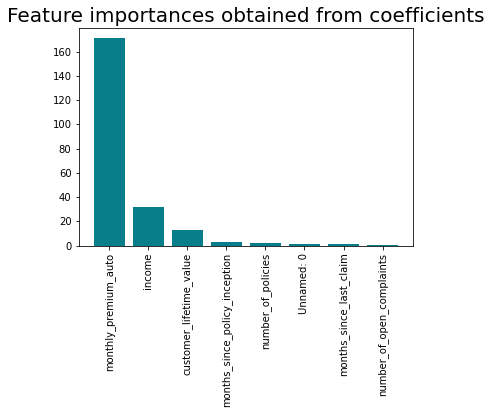

In [444]:
plt.bar(x=features_importances['Attribute'], height=features_importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show()

In [445]:
categorical

,region,response,coverage,education,effective_to_date,month,employment_status,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,central,no,basic,college,2/18/11,feb,employed,m,suburban,married,corporate auto,corporate l3,offer3,agent,four-door car,medsize
1,west region,no,basic,college,1/18/11,jan,unemployed,f,suburban,single,personal auto,personal l3,offer4,call center,four-door car,medsize
2,east,no,basic,bachelor,2/10/11,feb,employed,m,suburban,single,personal auto,personal l3,offer3,call center,suv,medsize
3,north west,yes,extended,college,1/11/11,jan,employed,m,suburban,single,corporate auto,corporate l3,offer2,branch,four-door car,medsize
4,north west,no,premium,bachelor,1/17/11,jan,medical leave,f,suburban,married,personal auto,personal l2,offer1,branch,four-door car,medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,central,no,premium,bachelor,1/19/11,jan,unemployed,f,suburban,married,personal auto,personal l1,offer3,web,luxury car,medsize
10685,north west,no,basic,college,1/6/11,jan,employed,f,urban,married,personal auto,personal l3,offer2,branch,four-door car,medsize
10686,central,no,extended,bachelor,2/6/11,feb,employed,f,rural,married,corporate auto,corporate l3,offer1,web,luxury suv,medsize
10687,west region,no,premium,college,2/13/11,feb,employed,f,urban,divorced,personal auto,personal l1,offer1,branch,suv,medsize


In [451]:
cat_columns= [new_categorical.columns]

In [453]:
for i in cat_columns: 
    numerical.boxplot(cat_columns[i])
    plt.show();
    

TypeError: list indices must be integers or slices, not Index

In [455]:
df2

,Unnamed: 0,region,customer_lifetime_value,response,coverage,education,effective_to_date,month,employment_status,gender,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,0,central,4809,no,basic,college,2/18/11,feb,employed,m,...,52,0,9,corporate auto,corporate l3,offer3,agent,292,four-door car,medsize
1,1,west region,2228,no,basic,college,1/18/11,jan,unemployed,f,...,26,0,1,personal auto,personal l3,offer4,call center,744,four-door car,medsize
2,2,east,14947,no,basic,bachelor,2/10/11,feb,employed,m,...,31,0,2,personal auto,personal l3,offer3,call center,480,suv,medsize
3,3,north west,22332,yes,extended,college,1/11/11,jan,employed,m,...,3,0,2,corporate auto,corporate l3,offer2,branch,484,four-door car,medsize
4,4,north west,9025,no,premium,bachelor,1/17/11,jan,medical leave,f,...,31,1,7,personal auto,personal l2,offer1,branch,707,four-door car,medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,10684,central,15563,no,premium,bachelor,1/19/11,jan,unemployed,f,...,40,2,7,personal auto,personal l1,offer3,web,1214,luxury car,medsize
10685,10685,north west,5259,no,basic,college,1/6/11,jan,employed,f,...,68,0,6,personal auto,personal l3,offer2,branch,273,four-door car,medsize
10686,10686,central,23893,no,extended,bachelor,2/6/11,feb,employed,f,...,63,0,2,corporate auto,corporate l3,offer1,web,381,luxury suv,medsize
10687,10687,west region,11971,no,premium,college,2/13/11,feb,employed,f,...,27,4,6,personal auto,personal l1,offer1,branch,618,suv,medsize


In [461]:
# Concatenating Numerical and Categorical
df_new = pd.concat([numerical, new_categorical], axis=1)

In [462]:
df_new

,Unnamed: 0,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,region_east,...,sales_channel_branch,sales_channel_call center,sales_channel_web,vehicle_class_luxury car,vehicle_class_luxury suv,vehicle_class_sports car,vehicle_class_suv,vehicle_class_two-door car,vehicle_size_medsize,vehicle_size_small
0,0,4809,48029,61,7,52,0,9,292,0,...,0,0,0,0,0,0,0,0,1,0
1,1,2228,26794,64,3,26,0,1,744,0,...,0,1,0,0,0,0,0,0,1,0
2,2,14947,22139,100,34,31,0,2,480,1,...,0,1,0,0,0,0,1,0,1,0
3,3,22332,49078,97,10,3,0,2,484,0,...,1,0,0,0,0,0,0,0,1,0
4,4,9025,23675,117,15,31,1,7,707,0,...,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,10684,15563,64811,253,8,40,2,7,1214,0,...,0,0,1,1,0,0,0,0,1,0
10685,10685,5259,61146,65,7,68,0,6,273,0,...,1,0,0,0,0,0,0,0,1,0
10686,10686,23893,39837,201,11,63,0,2,381,0,...,0,0,1,0,1,0,0,0,1,0
10687,10687,11971,64195,158,0,27,4,6,618,0,...,1,0,0,0,0,0,1,0,1,0


In [463]:
X=df_new.drop('total_claim_amount', axis=1)
y=df_new.total_claim_amount

,Unnamed: 0,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,region_east,...,sales_channel_branch,sales_channel_call center,sales_channel_web,vehicle_class_luxury car,vehicle_class_luxury suv,vehicle_class_sports car,vehicle_class_suv,vehicle_class_two-door car,vehicle_size_medsize,vehicle_size_small
0,0,4809,48029,61,7,52,0,9,292,0,...,0,0,0,0,0,0,0,0,1,0
1,1,2228,26794,64,3,26,0,1,744,0,...,0,1,0,0,0,0,0,0,1,0
2,2,14947,22139,100,34,31,0,2,480,1,...,0,1,0,0,0,0,1,0,1,0
3,3,22332,49078,97,10,3,0,2,484,0,...,1,0,0,0,0,0,0,0,1,0
4,4,9025,23675,117,15,31,1,7,707,0,...,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,10684,15563,64811,253,8,40,2,7,1214,0,...,0,0,1,1,0,0,0,0,1,0
10685,10685,5259,61146,65,7,68,0,6,273,0,...,1,0,0,0,0,0,0,0,1,0
10686,10686,23893,39837,201,11,63,0,2,381,0,...,0,0,1,0,1,0,0,0,1,0
10687,10687,11971,64195,158,0,27,4,6,618,0,...,1,0,0,0,0,0,1,0,1,0


H0: the people are not different and have blood preassure is u= 120mm Hg
H1: the people are different and have blood preassure is u!= 120mm Hg
the T value for the t-student distribution is 
t=(mean(samples)-mean(population))/(standard deviation(root(population)
t= 130.1 -120/21.21(root(100) = 0.0476 ->
we need to do the t-yails test analysis because we need to check if the group is signigicantly less or more. 
note: it is not a normal distribution (gaussian is a normal distribution)
then we count 95% as the considered gaussian area and since we have 2 tails distribution we divide by 2 
(2 rejected areas at the gaussian tails) and we will have then the rest 5% divided in 2 having 2,5% --> 0.025

In [ ]:
is it stadisticatly significantly??

In [ ]:
for standarize only the numerical values 


In [ ]:
#para 
for i in transformed_cols:
    sns.boxplot(data=df[tranformed_cols])


In [ ]:
Data introduction: data, features, objective 
